 
# <div style="text-align: center; background-color:turquoise; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">Data-Driven Analytics for Predicting On-Time Product Delivery</div> 

## Business Scope

The business scope for the Shipping Dataset involves developing a robust machine learning model to accurately predict whether the product that is shipped reached to customer on time or not. The application of this predictive model aims to optimize shipping system, improve on the basis of customer feedback, and contribute to wellbeing of our shipping company. This initiative aims for timely reach of each product to customer. The success of the project will be measured by the model's accuracy, precision, recall.

## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">About dataset</div>

Columns names:

1. ID:
    It is a numerical column.
    Each product has its own unique id.
2. Warehouse_block:
    It is a categorical column.
    The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
3. Mode of shipment:
    It is a categorical column.
    The Company Ships the products in multiple way such as Ship, Flight and Road.
4. Customer care calls:
    It is a numerical column.
    The number of calls made from enquiry for enquiry of the shipment.
5. Customer rating:
    It is a numerical column.
    The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. Cost of the product:
    It is a numerical column.
    Cost of the Product in US Dollars.
7. Prior purchases:
    It is a numerical variable.
    The Number of Prior Purchase.
8. Product importance:
    It is a categorical column.
    The company has categorized the product in the various parameter such as low, medium, high.
    
9. Gender:
    It is a categorical column.
    Male and Female.
10. Discount offered:
    It is a numerical column.
    Discount offered on that specific product.
11. Weight in gms:
    It is a numerical column.
     It is the weight in grams.
12. Reached on time:
    It is a numerical column.
    It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
    It is our target variable.
    

In [1]:
#!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df=pd.read_csv("shipping.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px"> Exploratory Data Analysis (EDA)

EDA (Exploratory Data Analysis) is the process of exploring and summarizing a dataset to understand its main patterns, relationships, and anomalies.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
# Descriptive Statistics
stats = df.describe()

stats

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


- Central tendency measures the center of a data set. Common measures include: <br> Mean: The average of all data points. Median: The middle value when the data points are sorted. Mode: The most frequently occurring value.
- Dispersion measures the spread of data points around the center. Common measures include: <br> Range: The difference between the maximum and minimum values. Variance: The average of the squared differences from the mean.
  Deviation: The square root of the variance, indicating how much the data points deviate from the mean.
- Correlation measures the strength and direction of the linear relationship between two variables.

In [5]:
# In-depth Data Analysis
central_tendency_mean = df[['Customer_care_calls', 'Customer_rating']].mean()
central_tendency_median = df[['Customer_care_calls', 'Customer_rating']].median()
central_tendency_mode = df[['Customer_care_calls', 'Customer_rating']].mode()
dispersion = df[['Customer_care_calls', 'Customer_rating']].std()
correlation = df[['Customer_care_calls', 'Customer_rating']].corr()

print("Central Tendency_mean: \n", central_tendency_mean)
print("Central Tendency_median: \n", central_tendency_median)
print("Central Tendency_mode: \n", central_tendency_mode)
print("-----------------------------")
print("Dispersion: \n", dispersion)
print("-----------------------------")
print("Correlation: \n", correlation)


Central Tendency_mean: 
 Customer_care_calls    4.054459
Customer_rating        2.990545
dtype: float64
Central Tendency_median: 
 Customer_care_calls    4.0
Customer_rating        3.0
dtype: float64
Central Tendency_mode: 
    Customer_care_calls  Customer_rating
0                    4                3
-----------------------------
Dispersion: 
 Customer_care_calls    1.141490
Customer_rating        1.413603
dtype: float64
-----------------------------
Correlation: 
                      Customer_care_calls  Customer_rating
Customer_care_calls             1.000000         0.012209
Customer_rating                 0.012209         1.000000


**A correlation coefficient of 0.012209 between two columns indicates a very weak positive linear relationship between the two variables.**

In [6]:
df.groupby(['Product_importance'])['Cost_of_the_Product'].sum().reset_index()

,Product_importance,Cost_of_the_Product
0,high,193270
1,low,1123281
2,medium,995404


In [7]:
df.groupby(['Mode_of_Shipment'])['Cost_of_the_Product'].sum().reset_index()

,Mode_of_Shipment,Cost_of_the_Product
0,Flight,371938
1,Road,370437
2,Ship,1569580


In [8]:
# Advanced Grouping and Aggregation
grouped_df = df.groupby('Warehouse_block').agg({'Customer_care_calls': 'mean', 'Customer_rating': 'mean','Reached.on.Time_Y.N': 'mean'})
grouped_df

,Customer_care_calls,Customer_rating,Reached.on.Time_Y.N
Warehouse_block,,,
A,4.038189,2.957447,0.586470
B,4.020185,2.980360,0.602291
C,4.064921,2.993999,0.596836
D,4.053435,3.017993,0.597601
F,4.075014,2.996727,0.598472


## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px"> Hypothesis Testing


### Hypothesis 1:

- Null Hypothesis (H0): There is no significant difference in weight between mode of shipment.

- Alternative Hypothesis (H1): There is a significant difference in weight between mode of shipment.








In [10]:
from scipy.stats import f_oneway

# Extract the weights for each shipping mode
weights_flight = df[df['Mode_of_Shipment'] == 'Flight']['Weight_in_gms']
weights_ship = df[df['Mode_of_Shipment'] == 'Ship']['Weight_in_gms']
weights_road = df[df['Mode_of_Shipment'] == 'Road']['Weight_in_gms']

# Perform one-way ANOVA
f_stat, p_val = f_oneway(weights_flight, weights_ship, weights_road)

print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("There is a significant difference in weight between different shipping modes.")
else:
    print("There is no significant difference in weight between different shipping modes.")


F-statistic: 0.09566633784305321
p-value: 0.9087679430733757
There is no significant difference in weight between different shipping modes.


### Hypothesis 2:

- Null Hypothesis (H0): There is no significant difference in customer rating between genders.

- Alternative Hypothesis (H1): There is a significant difference in customer rating between genders.







In [11]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(df[df['Gender'] == 'F']['Customer_rating'],
                          df[df['Gender'] == 'M']['Customer_rating'])

print("t-statistic:", t_stat)
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("There is a significant difference in customer rating between genders.")
else:
    print("There is no significant difference in customer rating between genders.")


t-statistic: -0.290983505660064
p-value: 0.7710694221041373
There is no significant difference in customer rating between genders.


## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px"> Data Cleaning and Preprocessing

## Preprocessing Techniques


- Dropping irrelevant feature
- Identifying the features and target variable
- Separating features and target
- Checking for missing values
- Checking for unique values
- Label encoding categorical data
- One hot encoding remaining categorical data
- Splitting data
- Feature scaling

In [3]:
#Dropping ID column
df=df.drop('ID',axis=1)
df.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [12]:
# --- 1) Separate features and target (safer to use -1 for last column) ---
X = df.iloc[:, :-1]    # DataFrame 
y = df.iloc[:, -1] 

In [13]:
# If y is categorical strings (not needed if already 0/1), encode it:
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = pd.Series(le.fit_transform(y), index=y.index)

In [14]:
# --- 2) Choose categorical and numeric columns by name ---
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numeric_cols = [c for c in X.columns if c not in categorical_cols]

In [20]:
a=df["Warehouse_block"].unique()
print(a)
print(df["Mode_of_Shipment"].unique())
print(df["Product_importance"].unique())
print(df["Gender"].unique())

['D' 'F' 'A' 'B' 'C']
['Flight' 'Ship' 'Road']
['low' 'medium' 'high']
['F' 'M']


In [15]:
# --- 3) Split BEFORE fitting transformers (avoid data leakage) ---
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y if len(y.unique())>1 else None
)

In [17]:
# --- 4) Build ColumnTransformer that OHEs categorical and scales numeric features only ---
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ],
    remainder="drop"   # we included all cols explicitly
)

In [18]:
# --- 5) Fit on training data, transform both train and test ---
X_train = preprocessor.fit_transform(X_train_df)
X_test  = preprocessor.transform(X_test_df)

In [ ]:

print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("first two rows (train):\n", X_train[:2])

X_train shape: (8799, 19)
X_test  shape: (2200, 19)
y_train distribution:
 Reached.on.Time_Y.N
1    0.596659
0    0.403341
Name: proportion, dtype: float64
first two rows (train):
 [[ 0.          0.          1.          0.          0.          0.
   1.          0.          0.          1.          0.          1.
   0.         -0.05198298  0.0100415  -0.37514254 -0.37098581  1.84328171
  -0.08255764]
 [ 0.          0.          0.          0.          1.          0.
   0.          1.          0.          0.          1.          1.
   0.         -0.05198298  1.423724    1.28591748 -1.02633698 -0.7635818
   1.06542814]]


## <div style="text-align: center; background-color:#80ced6; font-family:Impact; color: black; padding: 20px; line-height: 1;border-radius:20px">Data Visualization

- Histogram
- Box Plot
- Scatter Plot
- Correlation Matrix

1. Count Plot — Shipments Reached on Time vs Not on Time

C:\Users\Admin\AppData\Local\Temp\ipykernel_21332\951364815.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Reached.on.Time_Y.N", palette="viridis")


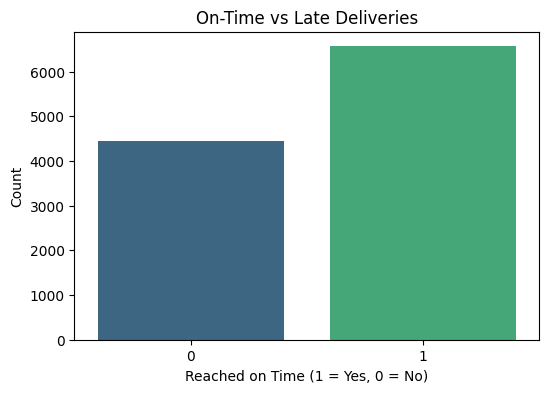

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Reached.on.Time_Y.N", palette="viridis")
plt.title("On-Time vs Late Deliveries")
plt.xlabel("Reached on Time (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


2. Boxplot — Product Cost vs On-time Delivery

C:\Users\Admin\AppData\Local\Temp\ipykernel_21332\2651411262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Reached.on.Time_Y.N", y="Cost_of_the_Product", palette="magma")


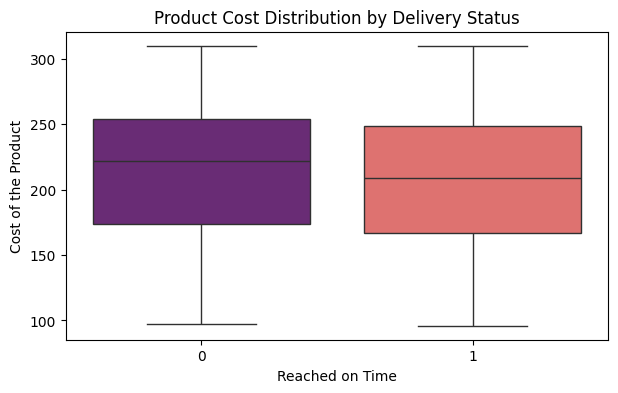

In [23]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Reached.on.Time_Y.N", y="Cost_of_the_Product", palette="magma")
plt.title("Product Cost Distribution by Delivery Status")
plt.xlabel("Reached on Time")
plt.ylabel("Cost of the Product")
plt.show()


This helps you see if expensive products have different delivery patterns.

3. Bar Plot — Average Discount Offered by Warehouse Block

C:\Users\Admin\AppData\Local\Temp\ipykernel_21332\4190048518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Warehouse_block", y="Discount_offered", palette="cubehelix")


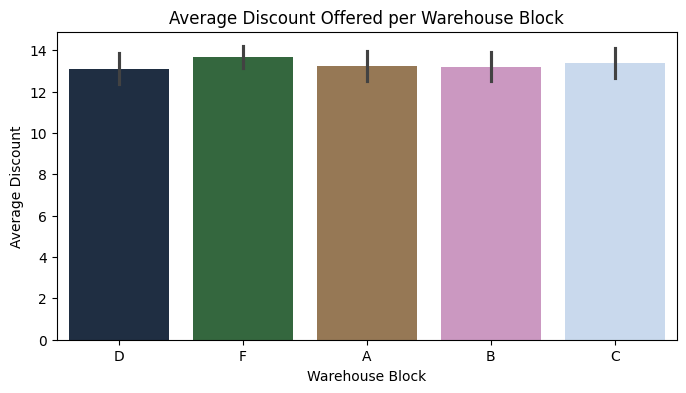

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x="Warehouse_block", y="Discount_offered", palette="cubehelix")
plt.title("Average Discount Offered per Warehouse Block")
plt.xlabel("Warehouse Block")
plt.ylabel("Average Discount")
plt.show()


4) Violin plot + swarm (distribution shape + points)

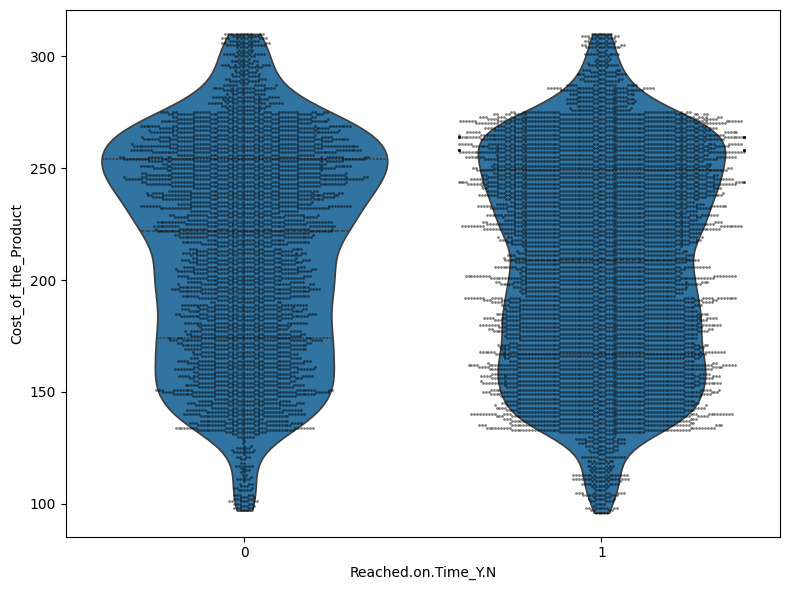

In [28]:
plt.figure(figsize=(8,6))

target_col = "Reached.on.Time_Y.N"
value_col = "Cost_of_the_Product"

plot_df = df[[target_col, value_col]].dropna()
sns.violinplot(
    data=plot_df, x=target_col, y=value_col,
    inner="quartile", cut=0
)

sns.swarmplot(
    data=plot_df, x=target_col, y=value_col,
    color="k", alpha=0.5, size=2, dodge=False
)

plt.tight_layout()
plt.show()


5) Hexbin density plot (continuous 2D density)

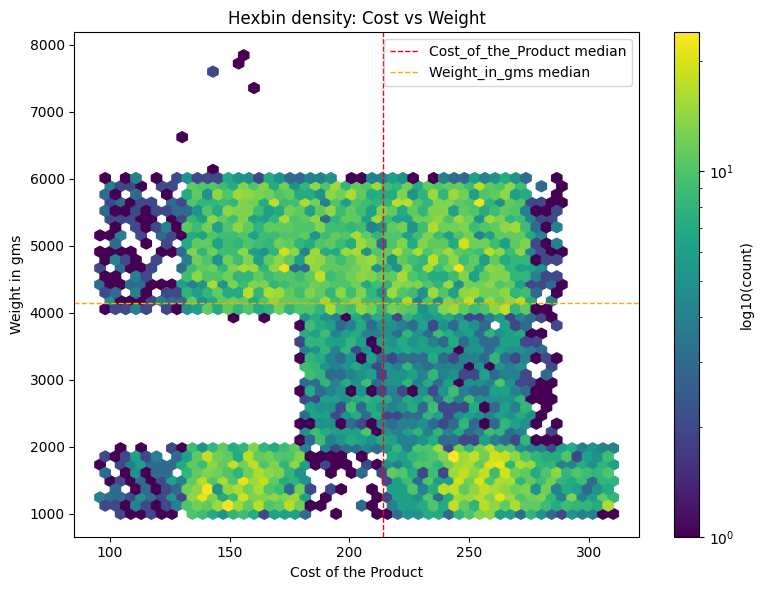

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x_col = "Cost_of_the_Product"
y_col = "Weight_in_gms"

# prepare numeric data and drop missing
hb_df = df[[x_col, y_col]].dropna()
x = hb_df[x_col].values
y = hb_df[y_col].values

plt.figure(figsize=(8,6))
# hexbin: use bins='log' if you want log-scaled color (helps with heavy tails)
hb = plt.hexbin(x, y, gridsize=50, mincnt=1, bins='log', cmap='viridis')
plt.colorbar(hb, label='log10(count)')

# optional: add median lines to help read values
plt.axvline(np.nanmedian(x), color='red', linestyle='--', linewidth=1, label=f"{x_col} median")
plt.axhline(np.nanmedian(y), color='orange', linestyle='--', linewidth=1, label=f"{y_col} median")

plt.xlabel("Cost of the Product")
plt.ylabel("Weight in gms")
plt.title("Hexbin density: Cost vs Weight")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


Why useful: hexbin surfaces dense regions and patterns (e.g., whether heavier products tend to be costlier) without the overplotting of a scatter. gridsize controls resolution; bins='log' helps when counts vary widely.

6) Correlation Heatmap (Only Numeric Columns)

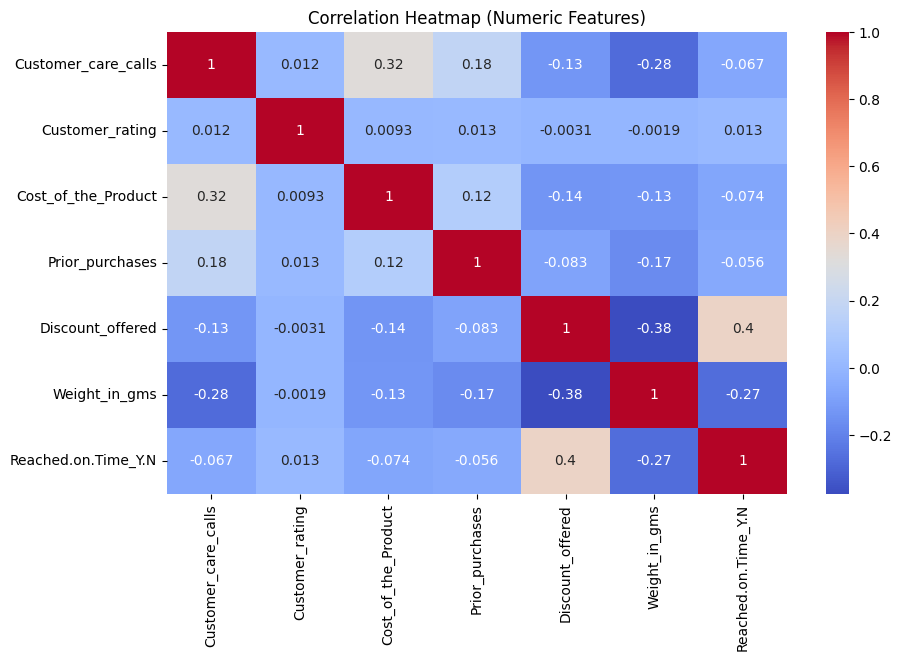

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
